# 금광
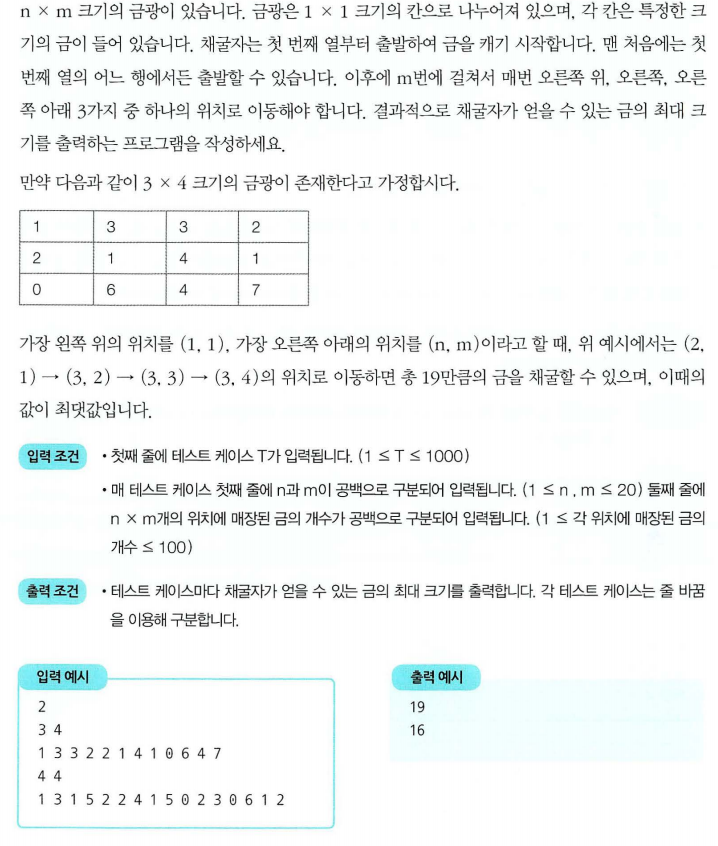

In [66]:
'''
다음 줄로 넘어갈 때마다 이전 스텝에서의 max값을 가져오면 될 듯?
'''
def test_case():
    yield '2'
    yield '3 4'
    yield '1 3 3 2 2 1 4 1 0 6 4 7'
    yield '4 4'
    yield '1 3 1 5 2 2 4 1 5 0 2 3 0 6 1 2'

def input():
    return next(G)
G = test_case()

import sys
from collections import defaultdict, deque


def search_max(cur_row, cur_col, max_row):    
    max_val = -1
    prev_col = cur_col - 1
    for i in range(-1, 2):  # 3가지 경우의 수 
        prev_row = cur_row + i
        if not(0 <= prev_row <= max_row):
            continue
        
        if max_val < array[prev_row][prev_col]:
            max_val = array[prev_row][prev_col]
    return max_val

for _ in range(int(input())):
    N, M = map(int, input().split())
    MAX_ROW = N-1
    array = list(map(int, input().split()))
    array = [array[i:i + M] for i in range(0, len(array), M)]
    
    print('# 업데이트 전')
    for i in array:
        print(i)
    
    for col in range(1, M):
        for row in range(N):
            max_val = search_max(row, col, MAX_ROW)
            array[row][col] += max_val
            
    print('#업데이트 후')
    for i in array:
        print(i)
    
    print('답:', max([x[-1] for x in array]))
    print()


# 업데이트 전
[1, 3, 3, 2]
[2, 1, 4, 1]
[0, 6, 4, 7]
#업데이트 후
[1, 5, 8, 14]
[2, 3, 12, 13]
[0, 8, 12, 19]
답: 19

# 업데이트 전
[1, 3, 1, 5]
[2, 2, 4, 1]
[5, 0, 2, 3]
[0, 6, 1, 2]
#업데이트 후
[1, 5, 8, 16]
[2, 7, 11, 14]
[5, 5, 13, 16]
[0, 11, 12, 15]
답: 16



# 정수 삼각형

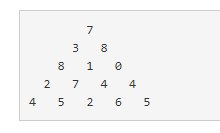

위 그림은 크기가 5인 정수 삼각형의 한 모습이다.

맨 위층 7부터 시작해서 아래에 있는 수 중 하나를 선택하여 아래층으로 내려올 때, 이제까지 선택된 수의 합이 최대가 되는 경로를 구하는 프로그램을 작성하라. 아래층에 있는 수는 현재 층에서 선택된 수의 대각선 왼쪽 또는 대각선 오른쪽에 있는 것 중에서만 선택할 수 있다.

삼각형의 크기는 1 이상 500 이하이다. 삼각형을 이루고 있는 각 수는 모두 정수이며, 범위는 0 이상 9999 이하이다.

#### 입력
첫째 줄에 삼각형의 크기 n(1 ≤ n ≤ 500)이 주어지고, 둘째 줄부터 n+1번째 줄까지 정수 삼각형이 주어진다.

#### 출력
첫째 줄에 합이 최대가 되는 경로에 있는 수의 합을 출력한다.

#### 예제 입력 1 
```
5
7
3 8
8 1 0
2 7 4 4
4 5 2 6 5
```
#### 예제 출력 1 
```
30
```

In [22]:
'''
월욜 문제랑 똑같이 접근하면 될 거 같아
* 현재 값 = max(11시 방향 값, 12시 방향 값) + 현재 값

'''
def test_case():
    yield '5'
    yield '7'
    yield '3 8'
    yield '8 1 0'
    yield '2 7 4 4'
    yield '4 5 2 6 5'

def input():
    return next(G)
G = test_case()

import sys

N = int(input())
array = [list(map(int, input().split())) for _ in range(N)]

if N == 1:
    print(array[0][0])

print('# 업데이트 전')
for i in array:
    print(i)
    
for i in range(1, N):
    row = array[i]
    last_idx = len(row) - 1
    
    for j in range(len(row)):        
        left = array[i-1][j-1] if j else 0
        right = array[i-1][j] if j < last_idx else 0
        row[j] += max(left ,right)
        
            
print('#업데이트 후')
for i in array:
    print(i)

print('답:', max(array[-1]))
print()


# 업데이트 전
[7]
[3, 8]
[8, 1, 0]
[2, 7, 4, 4]
[4, 5, 2, 6, 5]
#업데이트 후
[7]
[10, 15]
[18, 16, 15]
[20, 25, 20, 19]
[24, 30, 27, 26, 24]
답: 30



# 퇴사
상담원으로 일하고 있는 백준이는 퇴사를 하려고 한다.

오늘부터 N+1일째 되는 날 퇴사를 하기 위해서, 남은 N일 동안 최대한 많은 상담을 하려고 한다.

백준이는 비서에게 최대한 많은 상담을 잡으라고 부탁을 했고, 비서는 하루에 하나씩 서로 다른 사람의 상담을 잡아놓았다.

각각의 상담은 상담을 완료하는데 걸리는 기간 Ti와 상담을 했을 때 받을 수 있는 금액 Pi로 이루어져 있다.

N = 7인 경우에 다음과 같은 상담 일정표를 보자.

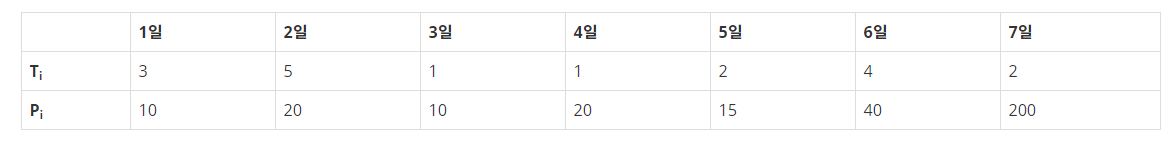

1일에 잡혀있는 상담은 총 3일이 걸리며, 상담했을 때 받을 수 있는 금액은 10이다. 5일에 잡혀있는 상담은 총 2일이 걸리며, 받을 수 있는 금액은 15이다.

상담을 하는데 필요한 기간은 1일보다 클 수 있기 때문에, 모든 상담을 할 수는 없다. 예를 들어서 1일에 상담을 하게 되면, 2일, 3일에 있는 상담은 할 수 없게 된다. 2일에 있는 상담을 하게 되면, 3, 4, 5, 6일에 잡혀있는 상담은 할 수 없다.

또한, N+1일째에는 회사에 없기 때문에, 6, 7일에 있는 상담을 할 수 없다.

퇴사 전에 할 수 있는 상담의 최대 이익은 1일, 4일, 5일에 있는 상담을 하는 것이며, 이때의 이익은 10+20+15=45이다.

상담을 적절히 했을 때, 백준이가 얻을 수 있는 최대 수익을 구하는 프로그램을 작성하시오.

#### 입력
첫째 줄에 N (1 ≤ N ≤ 15)이 주어진다.

둘째 줄부터 N개의 줄에 Ti와 Pi가 공백으로 구분되어서 주어지며, 1일부터 N일까지 순서대로 주어진다. (1 ≤ Ti ≤ 5, 1 ≤ Pi ≤ 1,000)

#### 출력
첫째 줄에 백준이가 얻을 수 있는 최대 이익을 출력한다.

#### 예제 입력 1 
```
7
3 10
5 20
1 10
1 20
2 15
4 40
2 200
```
#### 예제 출력 1 
```
45
```
#### 예제 입력 2 
```
10
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
```
#### 예제 출력 2 
55
#### 예제 입력 3 
```
10
5 10
5 9
5 8
5 7
5 6
5 10
5 9
5 8
5 7
5 6
```
#### 예제 출력 3 
20
#### 예제 입력 4 
```
10
5 50
4 40
3 30
2 20
1 10
1 10
2 20
3 30
4 40
5 50
```
#### 예제 출력 4 
90

In [22]:
'''
i째 날 cache값은 그 날까지 벌 수 있는 최대 수익이라고 했을 떄
i째 날 

'''
def test_case():
    yield '7'
    yield '3 10'
    yield '5 20'
    yield '1 10'
    yield '1 20'
    yield '2 15'
    yield '4 40'
    yield '2 200'

def input():
    return next(G)
G = test_case()
import sys

N = int(input())
t, p = map(list, zip(*([map(int, input().split()) for _ in range(N)])))
cache =  [0] * N

for i in range(N):
    if t[i] + i > N:  # 오늘 넘기면 퇴사만 남음
        continue
    
    cache[i] = p[i]  # 오늘 일할 경우
    
    # 과거에 일했으면 더 벌 수 있었을까?
    for j in range(i):
        if j + t[j] > i:  # i째 날보다 앞서버림
            continue
        cache[i] = max(cache[i], cache[j] + p[i])

print(max(cache))

45
